| 阶段名                   | 描述                                        |
| --------------------- | ----------------------------------------- |
| **timers**            | 执行 `setTimeout` 和 `setInterval` 中到期的回调。   |
| **pending callbacks** | 执行被延迟到下一个循环迭代的某些  `系统操作的回调`（如 TCP 错误类型回调）。    |
| **idle, prepare**     | 仅供内部使用的阶段，供 Node.js 做准备工作。                |    无需考虑
| **poll**              | 获取新的 I/O 事件；执行与 I/O 相关的回调（如网络、文件等）。       |
| **check**             | 执行 `setImmediate()` 的回调。                  |
| **close callbacks**   | 执行一些关闭操作的回调，例如 `socket.on('close', ...)`。 |

timer  poll  check

- Nodejs执行过程
- Nodejs 完整事件环
- •执行同步代码，将不同的任务添加至相应的队列
•-  所有同步代码执行后会去执行满足条件微任务
- •所有微任务代码执行后会执行timer 队列中满足的宏任务
•-  timer 中的所有宏任务执行完成后就会依次切换队列
•-  注意：在完成队列切换之前会先清空微任务代码

🔄 Node.js vs 浏览器事件循环对比
// • 任务队列数不同
// • Nodejs 微任务执行时机不同
// • 微任务优先级不同


| 特性/阶段                                     | 浏览器环境                                                  | Node.js 环境                                      |
| ----------------------------------------- | ------------------------------------------------------ | ----------------------------------------------- |
| 事件循环核心                                    | 宏任务 + 微任务                                              | 宏任务 + 微任务，但分为多个宏任务阶段                            |
| 微任务队列                                     | ✔️ `Promise.then`、`MutationObserver`                   | ✔️ `Promise.then`、`process.nextTick`（更高优先）      |
| 微任务执行时机                                   | 每个宏任务之后清空一次微任务队列                                       | 每个阶段（每一轮宏任务）后清空微任务队列                            |
| 特有微任务                                     | `MutationObserver`                                     | `process.nextTick`（插队）                          |
| 宏任务队列                                     | `setTimeout`, `setInterval`, `UI 事件`, `MessageChannel` | `timers`, `poll`, `check`, `close callbacks`, 等 |
| 宏任务阶段数量                                   | 统一宏任务队列                                                | 拆分多个阶段（timers → pending → poll → check）         |
| `setTimeout(fn, 0)` vs `setImmediate(fn)` | 没有 `setImmediate`                                      | 不同阶段执行（见下方说明）                                   |

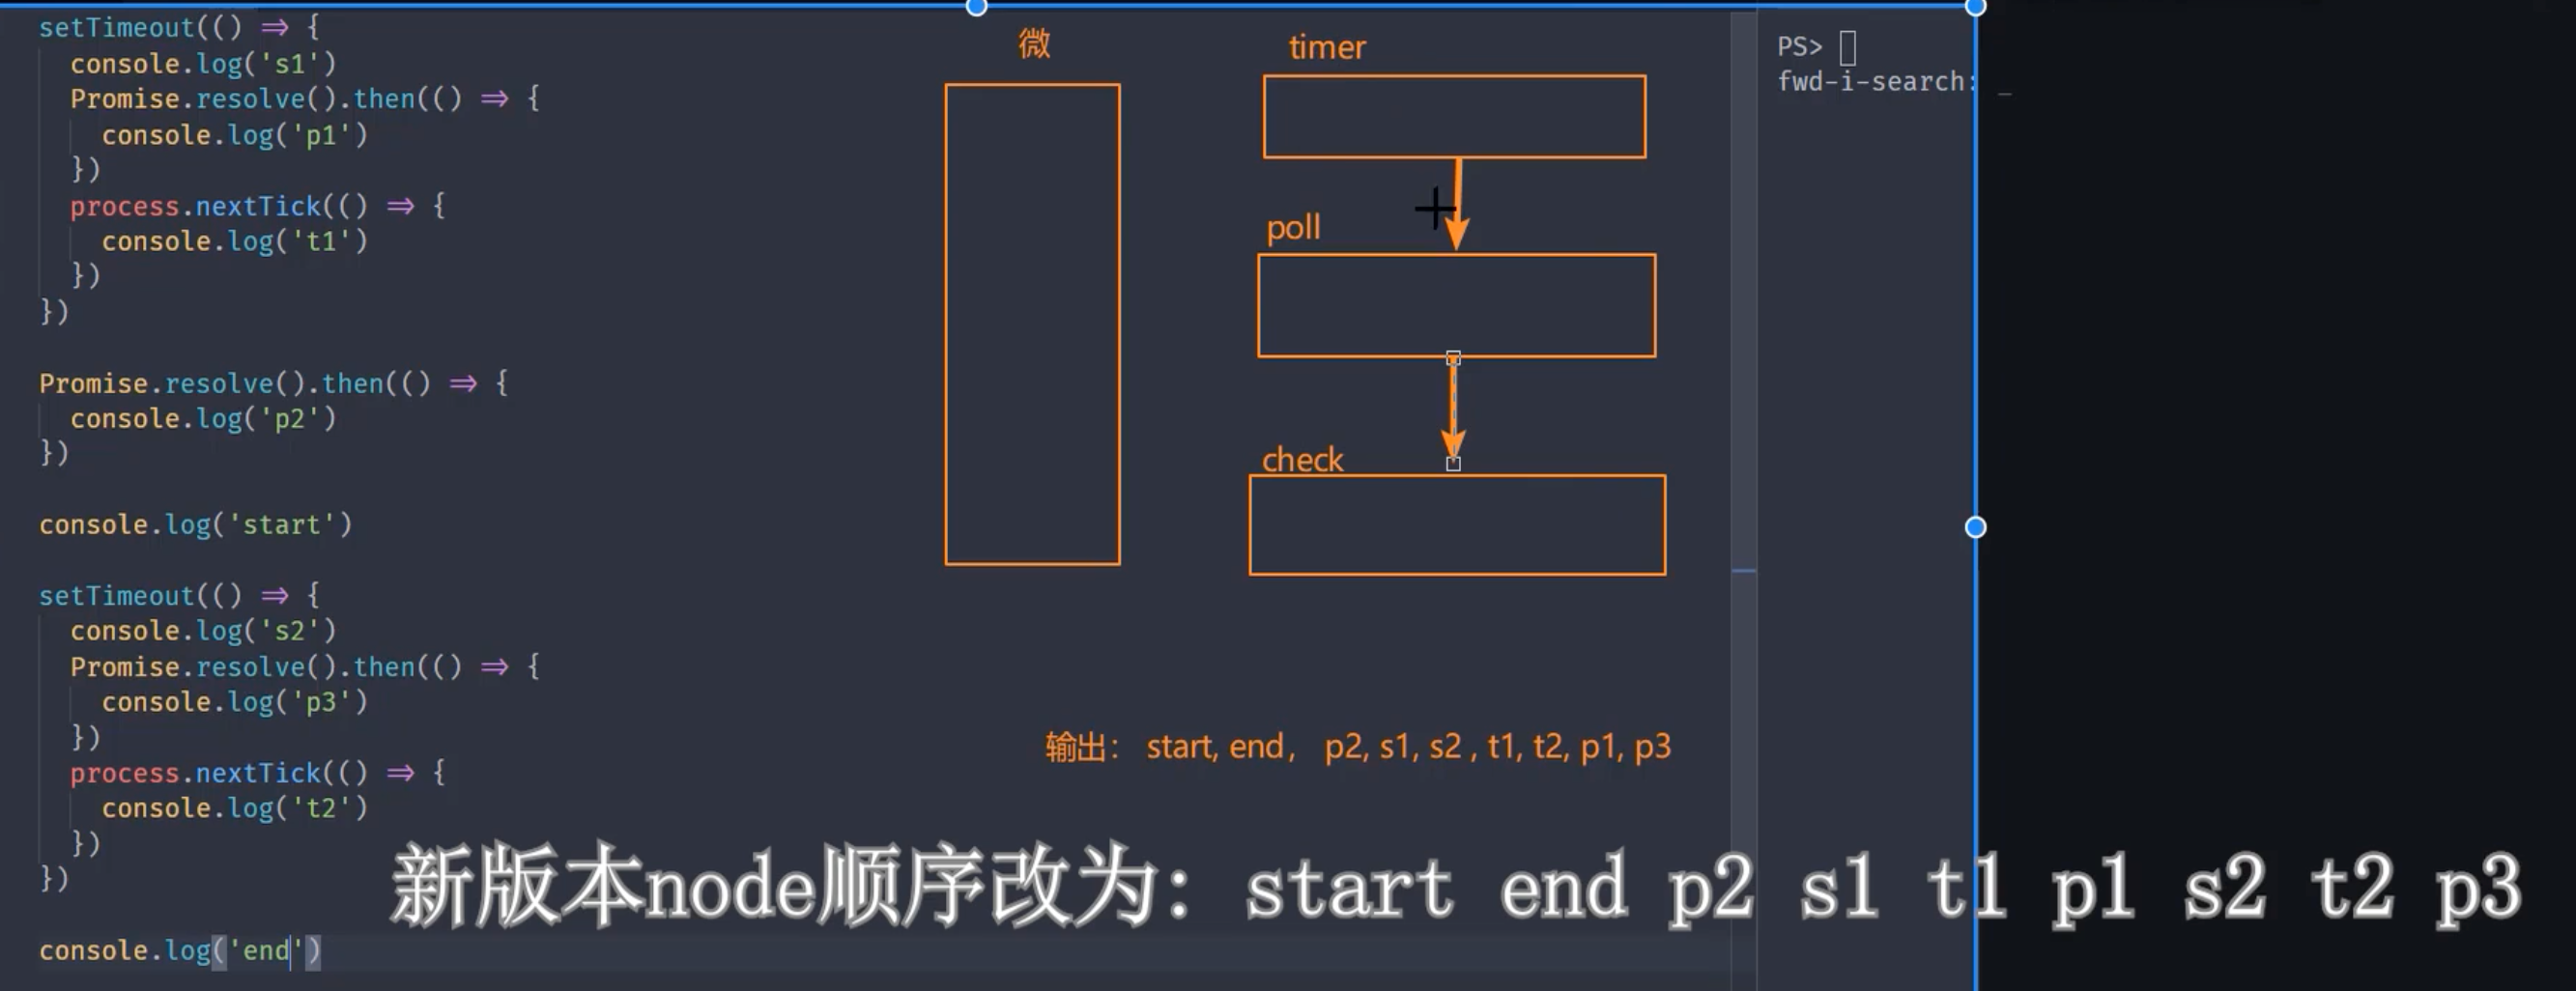

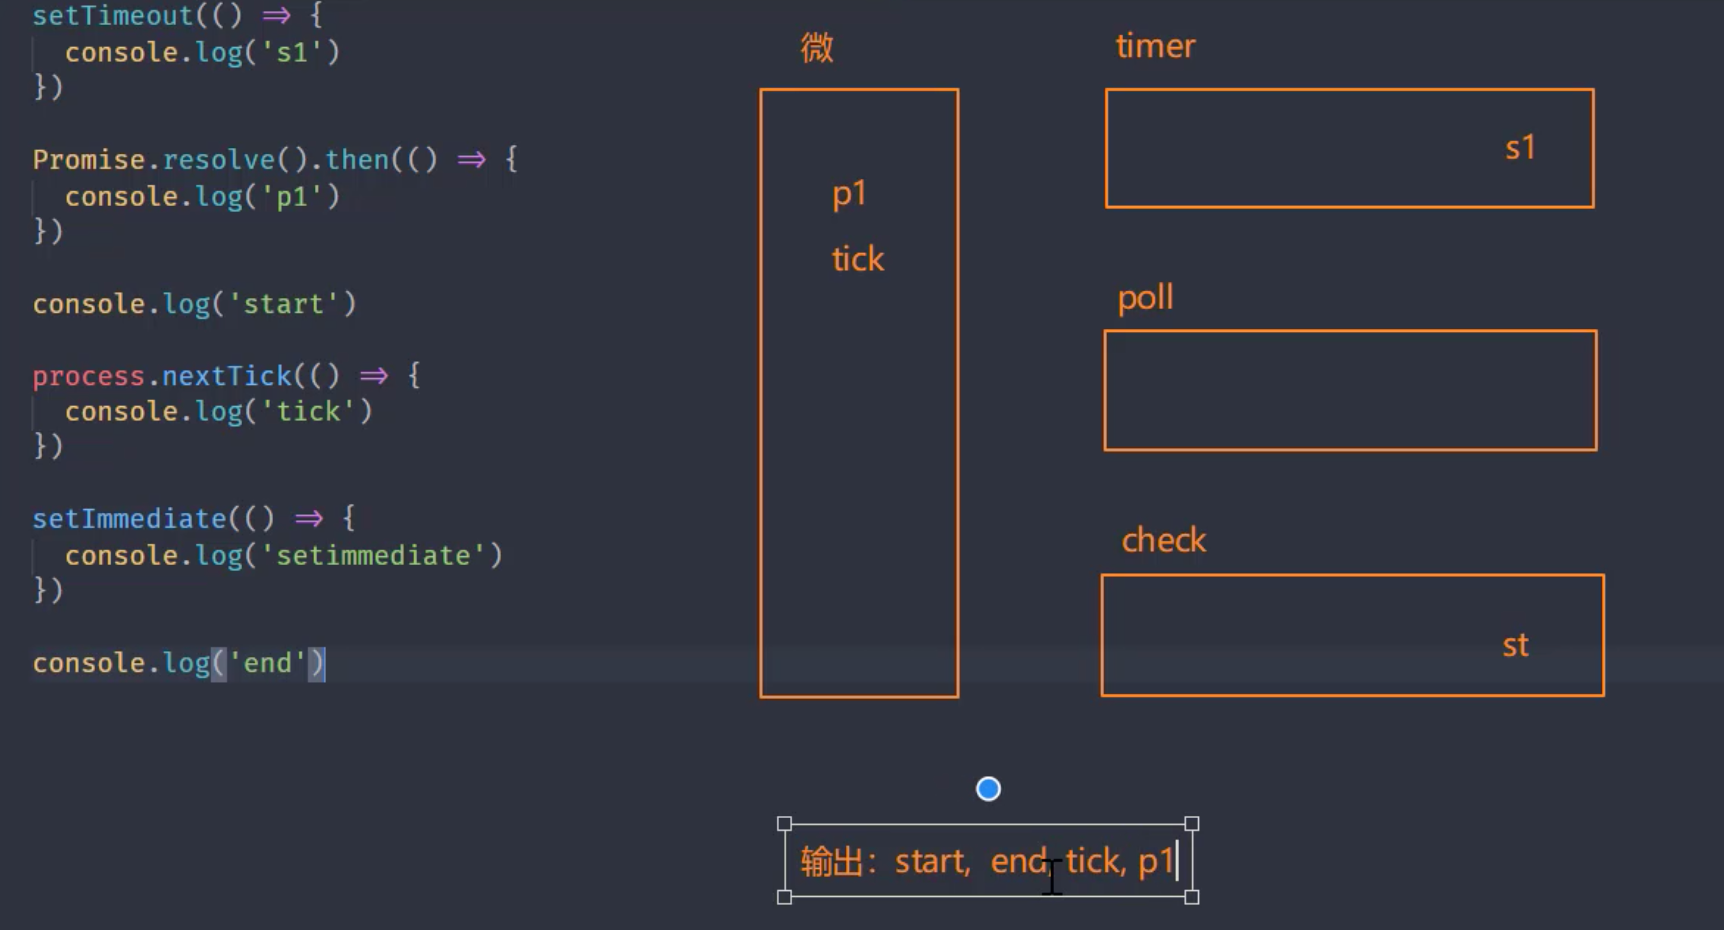

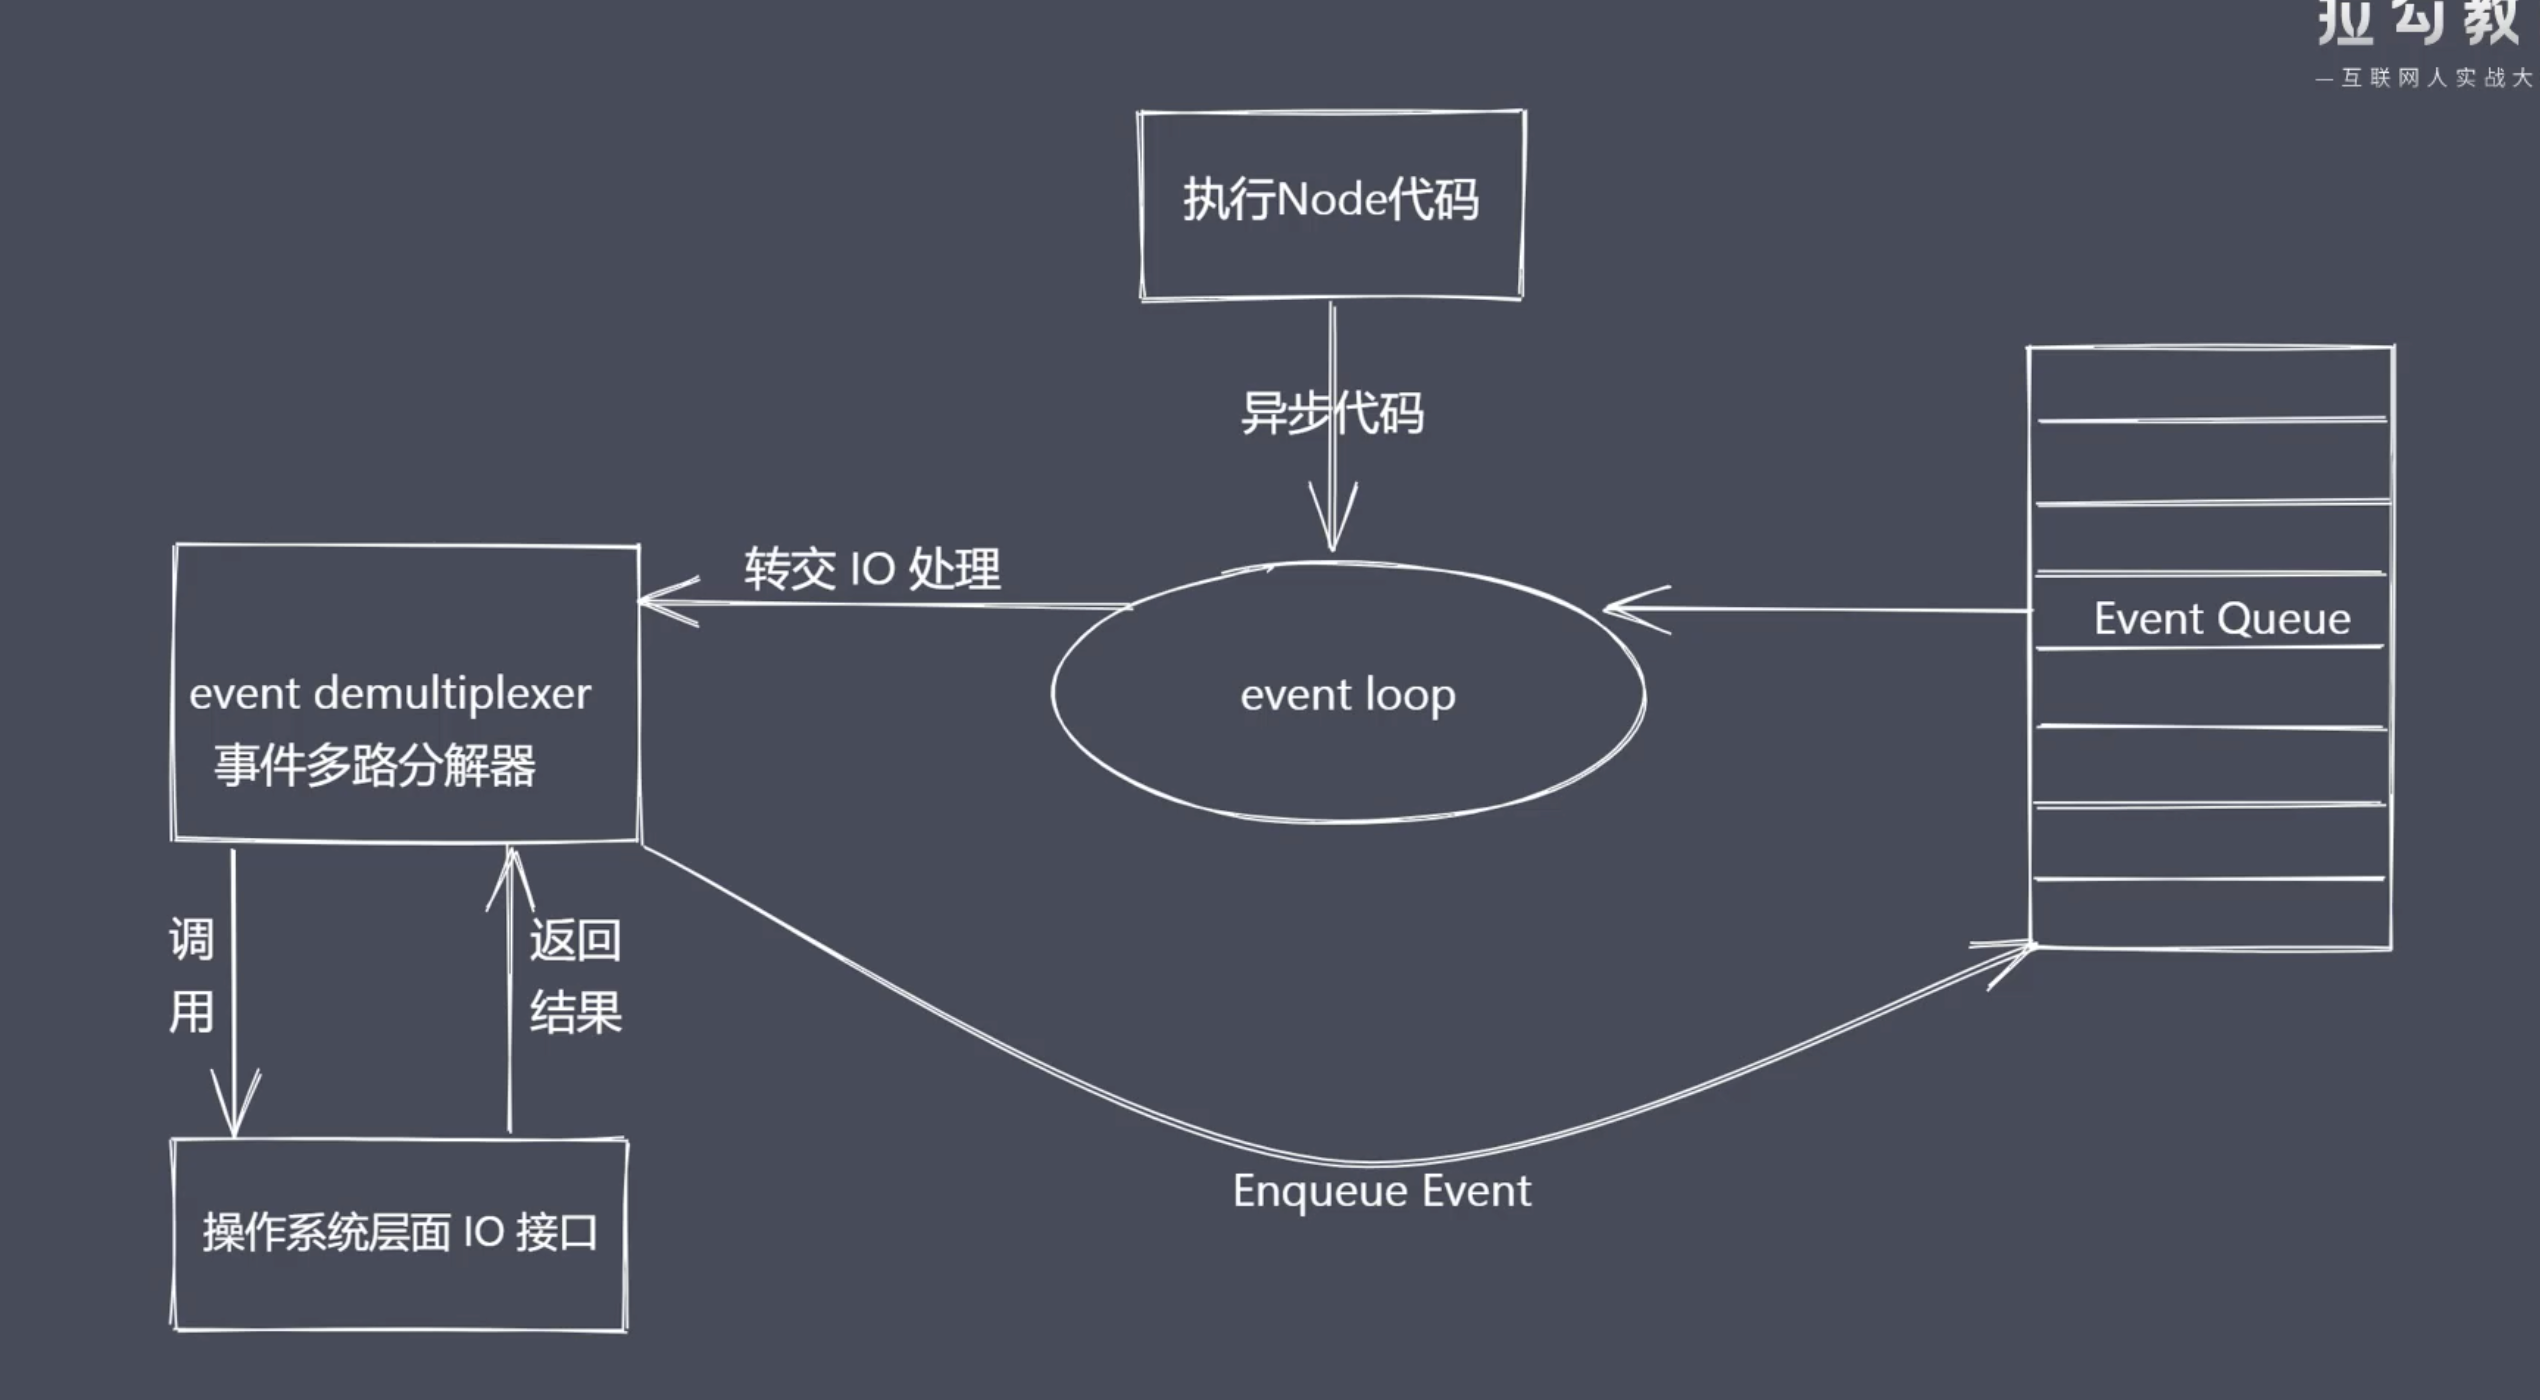

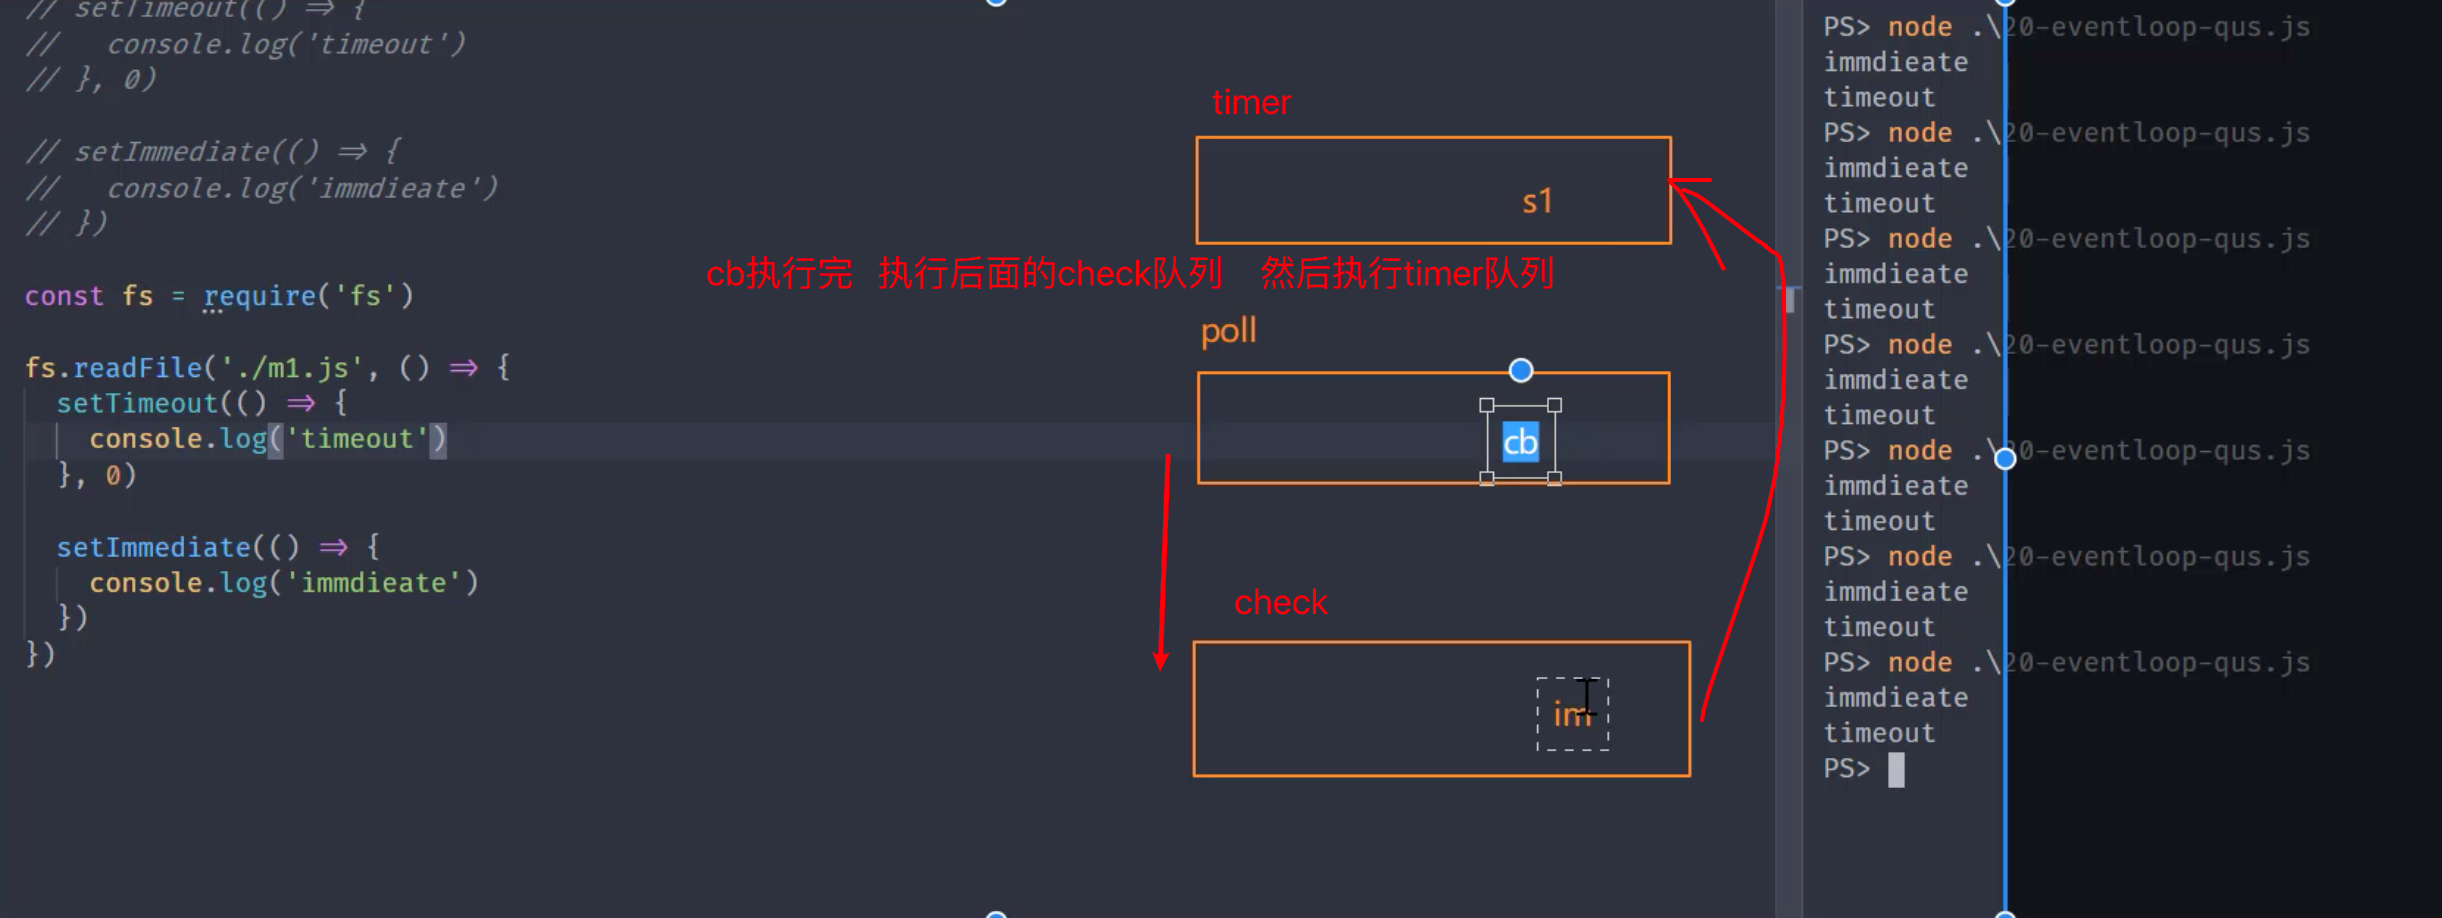